C:\Users\USER\AppData\Local\Temp\ipykernel_17088\193658932.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock_symbol, period="1y")
[*********************100%***********************]  1 of 1 completed


Price            Close        High         Low        Open    Volume
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL
Date                                                                
2024-07-05  225.286392  225.395881  220.618222  220.618222  60412400
2024-07-08  226.759521  226.789381  222.210787  226.032909  59085900
2024-07-09  227.615509  228.332159  225.316264  226.869000  48076100
2024-07-10  231.895493  231.995033  228.182860  228.232630  62627700
2024-07-11  226.510696  231.308252  224.719072  230.312907  64710600


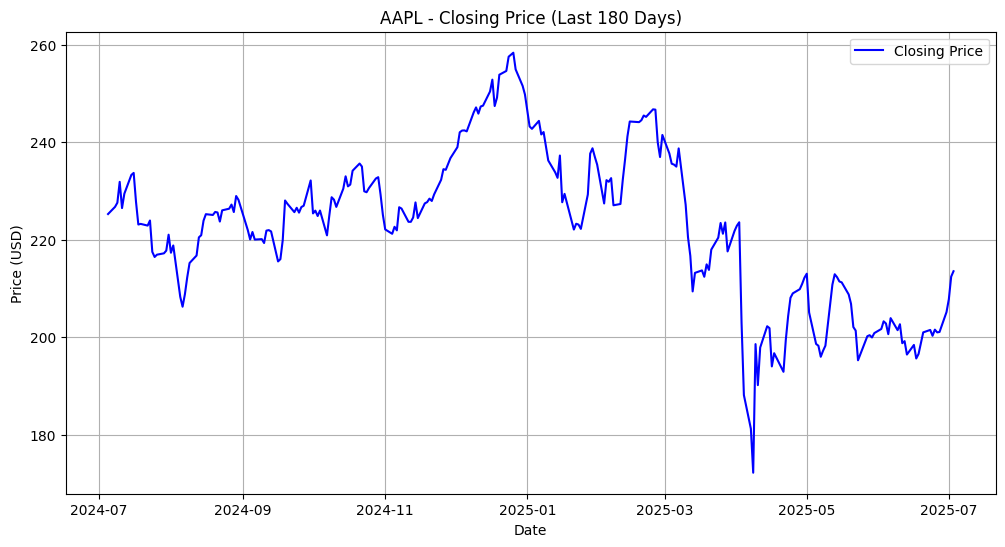

In [6]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# 🔧 Set your stock symbol (e.g., AAPL, TSLA, INFY, etc.)
stock_symbol = "AAPL"

# 📥 Download 180 days of historical data
data = yf.download(stock_symbol, period="1y")

# 🧹 Drop rows with missing values
data.dropna(inplace=True)

# 🖨️ Show sample
print(data.head())

# 📈 Plot closing price
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label="Closing Price", color="blue")
plt.title(f"{stock_symbol} - Closing Price (Last 180 Days)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.legend()
plt.show()


In [8]:
# STEP 2: Feature Engineering

# Create Previous Close
data['Previous_Close'] = data['Close'].shift(1)

# 5-day and 10-day Moving Averages
data['5_day_MA'] = data['Close'].rolling(window=5).mean()
data['10_day_MA'] = data['Close'].rolling(window=10).mean()

# Target = Today’s closing price (we'll predict this)
data['Target'] = data['Close']

# Drop rows with NaN values (due to moving averages and shifting)
data.dropna(inplace=True)

# Select Features and Target
features = ['Previous_Close', '5_day_MA', '10_day_MA', 'Volume']
X = data[features]
y = data['Target']

# Final check
print("Features:\n", X.head())
print("\nTarget:\n", y.head())


Features:
 Price      Previous_Close    5_day_MA   10_day_MA    Volume
Ticker                                                 AAPL
Date                                                       
2024-07-18     227.814590  229.490741  228.552132  66034600
2024-07-19     223.136444  228.250543  228.350078  49151500
2024-07-22     223.265854  226.172266  227.965875  48201800
2024-07-23     222.917496  224.219394  227.600583  39960300
2024-07-24     223.962585  222.161017  226.163304  61777600

Target:
 Date
2024-07-18    223.136444
2024-07-19    223.265854
2024-07-22    222.917496
2024-07-23    223.962585
2024-07-24    217.522705
Name: Target, dtype: float64


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# STEP 3: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"🔍 Mean Absolute Error: {mae:.2f}")
print(f"📈 R² Score: {r2:.2f}")



🔍 Mean Absolute Error: 2.65
📈 R² Score: 0.94
